# Ridge & Lasso Regression

정규화(regularized) 선형회귀 방법은 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

모형이 과도하게 최적화되면 모형 계수의 크기도 과도하게 증가하는 경향이 나타난다. 따라서 정규화 방법에서 추가하는 제약 조건은 일반적으로 계수의 크기를 제한하는 방법이다. 일반적으로 다음과 같은 세가지 방법이 사용된다.

- Ridge 회귀모형 
- Lasso 회귀모형
- Elastic Net 회귀모형



## Ridge Regression

L2 Regularization

Ridge 회귀모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right)
$$

$\lambda$는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다. $\lambda$가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다. $\lambda$가 작아지면 정규화 정도가 작아지며 $\lambda$ 가 0이 되면 일반적인 선형 회귀모형이 된다.

## Lasso Regression

L1 Regularization

Lasso(Least Absolute Shrinkage and Selection Operator) 회귀모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)
$$



## Ridge vs. Lasso
Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.


Ridge Regression can only shrink the slope asymptotically close to 0.(기울기 점근적으로 0)  
Lasso Regression can shrink the slope all the way to 0.

reference. https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exercise
Predict house price problem

This dataset contains house sale prices for King County, which includes Seattle. 

It includes homes sold between May 2014 and May 2015.

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)


Reference. https://www.kaggle.com/harlfoxem/housesalesprediction

### Step1: Load Dataset

In [2]:
# 'kc_house_data.csv' 파일 읽기 pd.read_csv()
# df shape 확인

df = pd.read_csv('kc_house_data.csv')
df.shape

(21613, 21)

In [3]:
# df head 행 보기

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# df descriptive statistics

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Step2: Visualize Dataset

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

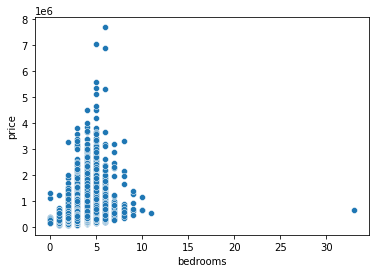

In [5]:
# sns.scatterplot 활용한 시각화. x='bedrooms', y='price'

sns.scatterplot(x = 'bedrooms', y = 'price', data = df)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

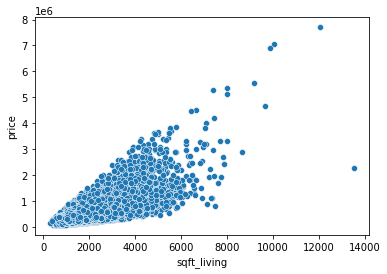

In [6]:
# sns.scatterplot 활용한 시각화. x='sqft_living', y='price'

sns.scatterplot(x = 'sqft_living', y = 'price', data = df)

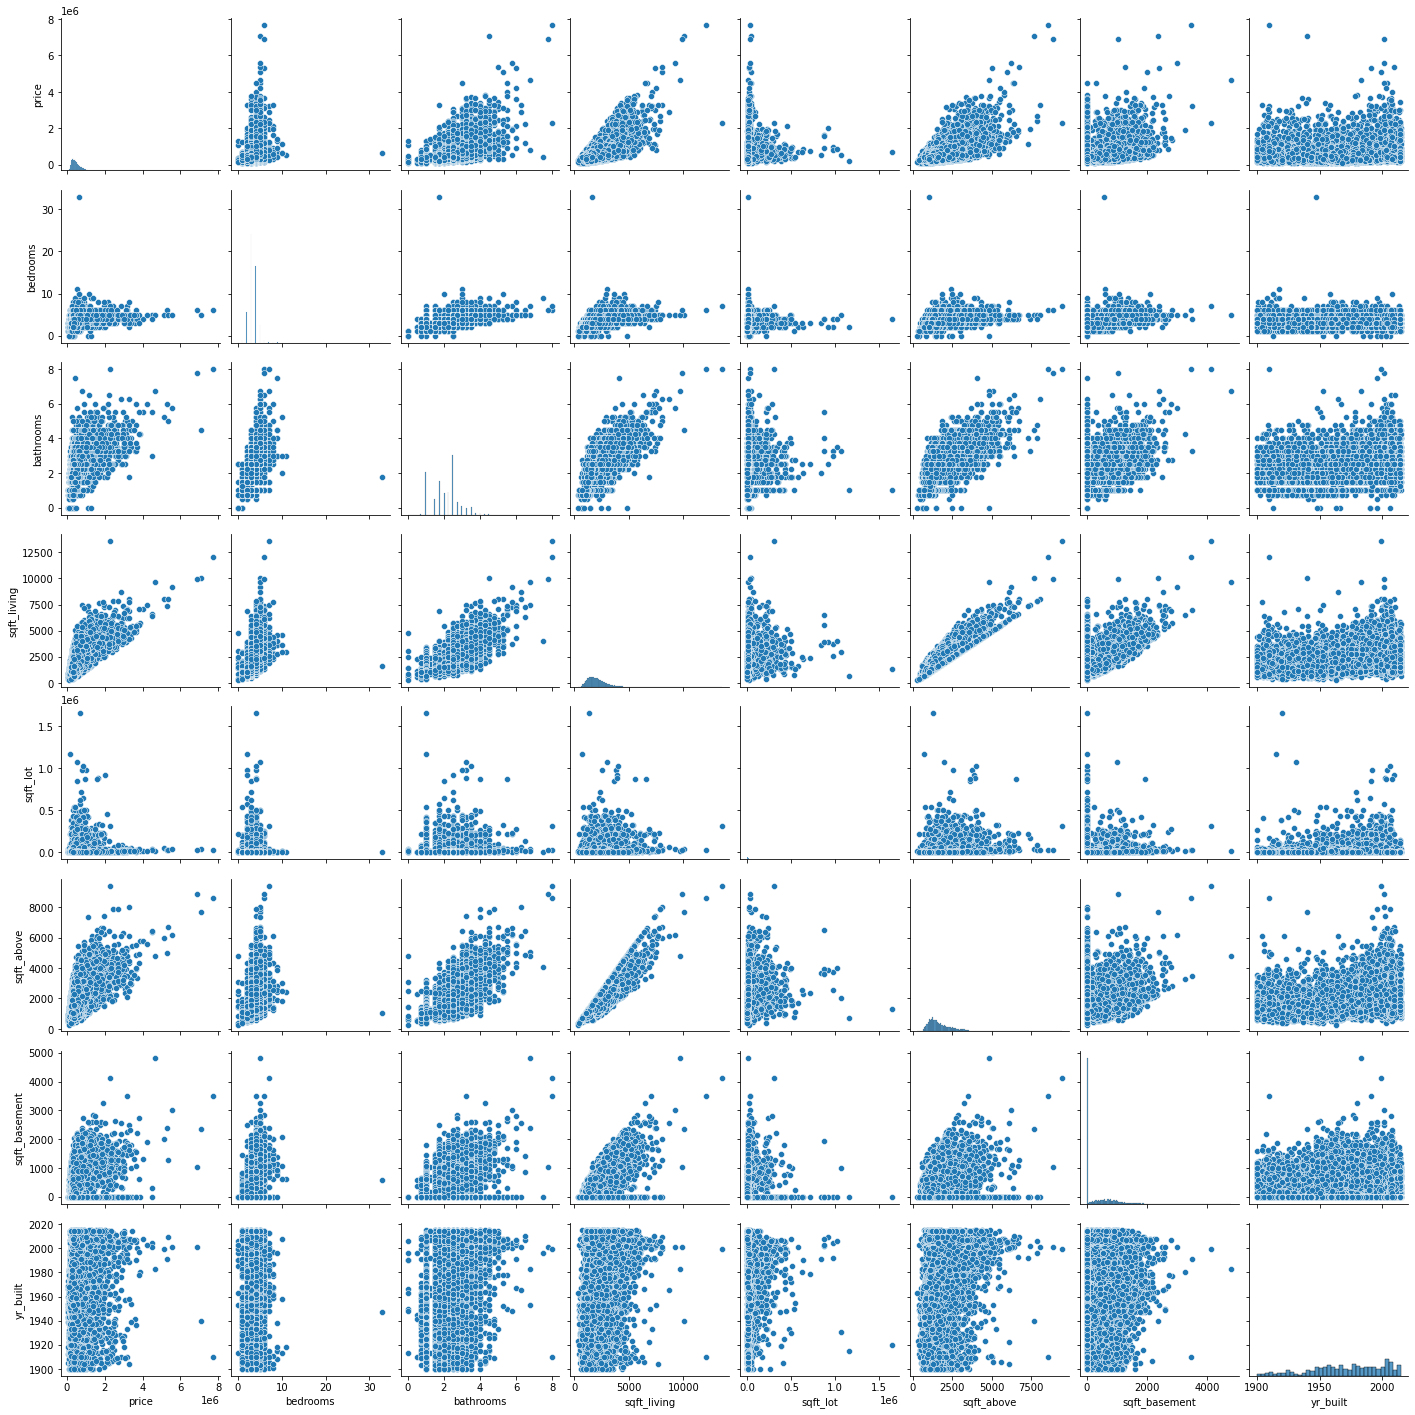

In [7]:
# 선택된 컬럼에 대한 pairplot
# ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']

pairplot_column = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']
sns.pairplot(df[pairplot_column])

<AxesSubplot:>

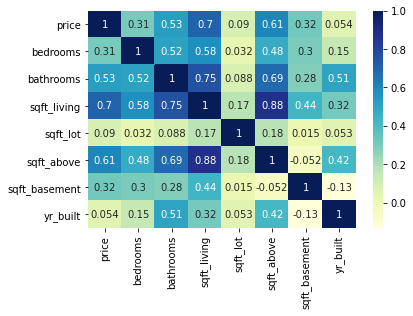

In [4]:
# 코릴레이션 히트멥, df.corr(), sns.heatmap() 사용, cmap='YlGnBu'
pairplot_column = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']
sns.heatmap(df[pairplot_column].corr(), annot = True, cmap='YlGnBu')

### Step3: Define Train set and Test Set

In [9]:
# selected_features 리스트 생성
# ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 
# 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15', 
# 'sqft_lot15', 'price']

# df_target 을 selected_features 컬럼만 가지도록 할당.

selected_features = ['bedrooms',
                     'bathrooms',
                     'sqft_living',
                     'sqft_lot',
                     'floors', 
                     'sqft_above', 
                     'sqft_basement', 
                     'waterfront', 
                     'view', 
                     'condition', 
                     'grade', 
                     'sqft_above', 
                     'yr_built', 
                     'sqft_living15', 
                     'sqft_lot15',
                     'price']

df_target = df[selected_features].copy()

In [10]:
# X에 -1번째 column까지 할당
# y에 -1번째 column을 할당

X = df_target.iloc[:, :-1]
y = df_target.iloc[:, -1]

In [11]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---

### Step4: Train Model(Linear)

In [12]:
# define regressor type, and fit with train set

# from sklearn.linear_model import LinearRegression
# regressor에 LinearRegression으로 할당.
# X_train, y_train으로 regressor에 fit

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# regression model's Estimated coefficients

# regressor 의 coefficient 확인

regressor.coef_

array([-3.79722570e+04,  4.50930498e+04,  1.00986798e+02,  2.47837348e-02,
        2.95233681e+04,  3.16646263e+01,  6.93221714e+01,  6.03990941e+05,
        4.35754089e+04,  1.82483990e+04,  1.17807112e+05,  3.16646263e+01,
       -3.63327944e+03,  2.60942628e+01, -6.04985673e-01])

In [14]:
# regression model's independent term in the linear model.
# Set to 0.0 if fit_intercept = False.

# regressor의 intercept 확인

regressor.intercept_

6323885.980354364

### Step5: Predict value

In [15]:
# predict y values with trained regressor

# regressor.predict 활용하여 X_test로 y_pred 생성. 

y_pred = regressor.predict(X_test)

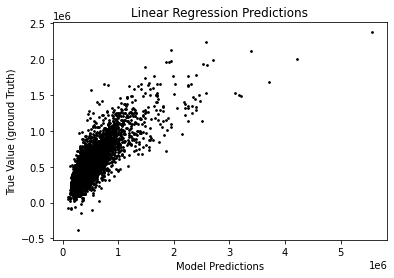

In [16]:
# test set visualization
plt.scatter(y_test, y_pred, color='black', s=3)

plt.title('Linear Regression Predictions')
plt.xlabel('Model Predictions')
plt.ylabel('True Value (ground Truth)')
plt.show()

### Step6: Model Evaluation

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2) 

RMSE = 205339.068 
MSE = 42164132984.0492 
MAE = 135897.30067543147 
R2 = 0.6454539243047728 
Adjusted R2 = 0.6442191457732129


---

### Step4: Train Model(Ridge)

In [18]:
# define regressor type, and fit with train set

# from sklearn.linear_model import Ridge
# regressor_ridge Ridge으로 할당.
# X_train, y_train 으로 regressor_ridge에 fit

from sklearn.linear_model import Ridge

regressor_ridge = Ridge()
regressor_ridge.fit(X_train, y_train)

Ridge()

In [19]:
# regression model's Estimated coefficients

# regressor 의 coefficient 확인

regressor_ridge.coef_

array([-3.79978069e+04,  4.50874473e+04,  1.01009412e+02,  2.44874979e-02,
        2.95263890e+04,  3.16923838e+01,  6.93186566e+01,  5.98796027e+05,
        4.38305020e+04,  1.82517555e+04,  1.17776044e+05,  3.16919336e+01,
       -3.63322264e+03,  2.60594184e+01, -6.04781123e-01])

In [20]:
# regression model's independent term in the linear model.
# Set to 0.0 if fit_intercept = False.

# regressor의 intercept 확인

regressor_ridge.intercept_

6324002.229141653

### Step5: Predict value

In [21]:
# predict y values with trained regressor

# regressor.predict 활용하여 X_test로 y_pred 생성. 

y_pred = regressor_ridge.predict(X_test)

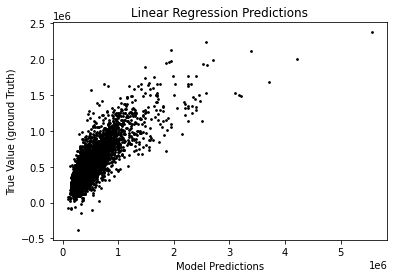

In [22]:
# test set visualization
plt.scatter(y_test, y_pred, color='black', s=3)

plt.title('Linear Regression Predictions')
plt.xlabel('Model Predictions')
plt.ylabel('True Value (ground Truth)')
plt.show()

### Step6: Model Evaluation

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2) 

RMSE = 205322.86 
MSE = 42157476669.20346 
MAE = 135896.5201226556 
R2 = 0.6455098953431916 
Adjusted R2 = 0.6442753117421114


---

### Step4: Train Model(Lasso)

In [24]:
# define regressor type, and fit with train set

# from sklearn.linear_model import Lasso
# regressor_lasso Lasso으로 할당.
# X_train, y_train 으로 regressor_lasso에 fit

from sklearn.linear_model import Lasso

regressor_lasso = Lasso()
regressor_lasso.fit(X_train, y_train)

/Users/gs/opt/anaconda3/envs/mlpractice/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377320312665042.44, tolerance: 239817151220.12622
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [25]:
# regression model's Estimated coefficients

# regressor 의 coefficient 확인

regressor_lasso.coef_

array([-3.79710816e+04,  4.50892582e+04,  2.79236196e+02,  2.47748548e-02,
        2.95190604e+04,  2.39288048e+01, -1.08925205e+02,  6.03848698e+05,
        4.35810948e+04,  1.82454745e+04,  1.17805652e+05, -1.38843942e+02,
       -3.63324440e+03,  2.60932901e+01, -6.04987260e-01])

In [26]:
# regression model's independent term in the linear model.
# Set to 0.0 if fit_intercept = False.

# regressor의 intercept 확인

regressor_lasso.intercept_

6323840.924405839

### Step5: Predict value

In [27]:
# predict y values with trained regressor

# regressor.predict 활용하여 X_test로 y_pred 생성. 

y_pred = regressor_lasso.predict(X_test)

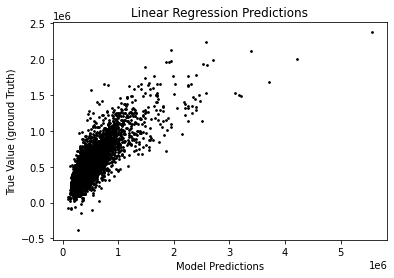

In [28]:
# test set visualization
plt.scatter(y_test, y_pred, color='black', s=3)

plt.title('Linear Regression Predictions')
plt.xlabel('Model Predictions')
plt.ylabel('True Value (ground Truth)')
plt.show()

### Step6: Model Evaluation

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2) 

RMSE = 205338.653 
MSE = 42163962411.70257 
MAE = 135897.28277855855 
R2 = 0.6454553585986107 
Adjusted R2 = 0.6442205850622696
